In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image
import matplotlib.cm as cm 
import scipy
import cmath


In [144]:
A=1000 #Tasa decaimiento
B=20 #Tasa extracción
vidaU = 23.34*(1/60)*(1/24) #Dias
vidaNp = 2.36 #Dias
λU = np.log(2)/vidaU
λNp = np.log(2)/vidaNp

U_est = A/λU
Pu_est = A/B
Np_est = A/λNp

#SISTEMA DETERMINISTA

def system(t,Y, A, B, λU, λNp):
    u, Np, pu = Y
    return [A-λU*u, #dU/dt
            λU*u - λNp*Np, #dNp/dt
            λNp*Np - B*pu #dPu/dt
            ]

#No sé de que otra manera acercarme al estado estable
def eventU(t, Y, A, B, λU, λNp):
    u, Np, pu = Y
    return round(u - U_est, 1)

def eventNp(t, Y, A, B, λU, λNp):
    u, Np, pu = Y
    return round(abs(Np - Np_est))
  
def eventPu(t, Y, A, B, λU, λNp):
    u, Np, pu = Y  
    return round(pu - Pu_est, 1)
    
sol = solve_ivp(system, 
                t_span=(0,100),
                y0=[0, 0, 0], #La planta empieza completamente limpia
                args=(A, B, λU, λNp), 
                max_step=0.05,
                dense_output=True,
                events=[eventU, eventNp, eventPu])


print(f"Uranio se acerca al estado estable de {round(U_est,3)} en {round(sol.t_events[0][0],3)} dias")
print(f"Plutonio se acerca al estado estable de {round(Pu_est,3)} en {round(sol.t_events[2][0],3)} dias")
print(f"Neptunio no se acerca lo suficiente al estado estable de {round(Np_est,3)} en 30 dias")

Uranio se acerca al estado estable de 23.384 en 0.191 dias
Plutonio se acerca al estado estable de 50.0 en 23.641 dias
Neptunio no se acerca lo suficiente al estado estable de 3404.76 en 30 dias


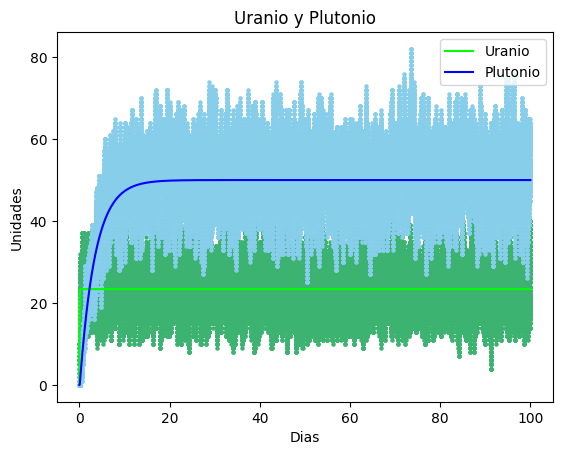

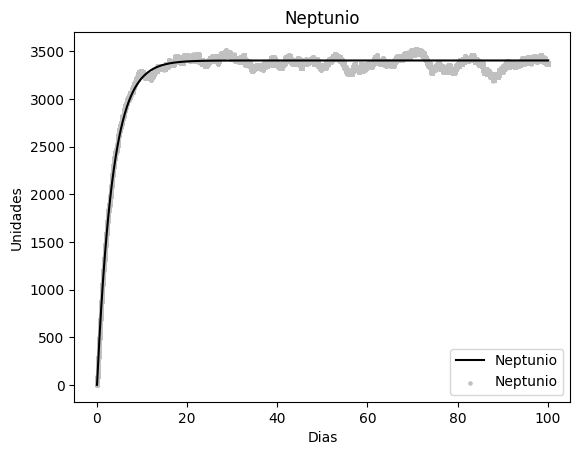

Con 100,000,000 simulaciones hasta 100 dias. Las veces que el plutonio pasó el nivel 80 fueron 16, por lo tanto su probabilidad es de 1.6e-07


In [149]:
#SISTEMA ESTOCÁSTICO
A=1000 #Tasa decaimiento
B=20 #Tasa extracción
vidaU = 23.34*(1/60)*(1/24) #Dias
vidaNp = 2.36 #Dias
λU = np.log(2)/vidaU
λNp = np.log(2)/vidaNp


R = np.array([1,2,3,4]) #Eventos

#Estado inicial
U = 0
Np = 0
Pu = 0
tiempo = 0

Uranium = [0]
Neptunium = [0]
Plutonium = [0]
temp = [0]

def evolucion(U, Np, Pu, A, λU, λNp, B, tiempo):
    tasas = np.array([A, U*λU, Np*λNp, B*Pu]) #Tasa de ocurrencia eventos
    tiempo += np.random.exponential(1/tasas.sum())
    r = np.random.choice(R,p=tasas/tasas.sum())
    if r == 1:
        U+=1
    elif r == 2:
        U-=1
        Np+=1
    elif r == 3:
        Np-=1
        Pu+=1
    else:
        Pu-=1
    return U, Np, Pu, tiempo

contadorPu = 0
N = 100_000_000
for k in range(N):
    while tiempo < 100:
        U, Np, Pu, tiempo = evolucion(U, Np, Pu, A, λU, λNp, B, tiempo)
        Uranium.append(U)
        Neptunium.append(Np)
        Plutonium.append(Pu)
        temp.append(tiempo)
        if Pu>=80:
            contadorPu+=1
    
plt.title("Uranio y Plutonio")
plt.ylabel("Unidades")
plt.xlabel("Dias")
plt.plot(sol.t, sol.y[0], c="lime", label="Uranio") 
plt.plot(sol.t, sol.y[2], c="blue", label="Plutonio")
plt.scatter(temp, Uranium, c="mediumseagreen", s=5)
plt.scatter(temp, Plutonium, c="skyblue", s=5)
plt.legend(loc=1)
plt.show()
plt.title("Neptunio")
plt.xlabel("Dias")
plt.ylabel("Unidades")
plt.plot(sol.t, sol.y[1], c="black", label="Neptunio")
plt.scatter(temp, Neptunium, c="silver", label="Neptunio", s=5)
plt.legend(loc=4)
plt.show()
print(f"Con {N:,} simulaciones hasta 100 dias. Las veces que el plutonio pasó el nivel 80 fueron {contadorPu}, por lo tanto su probabilidad es de {contadorPu/N}")
